# EDA

- 수해대피소 입지 분석 대상 지역을 아래 3가지 기준으로 정하기 위해 전처리 및 EDA 진행
  - 침수심이 낮은 지역
  - 수해대피소 수가 적은 지역
  - 독거노인(침수 피해에 대한 취약자)이 많은 지역

## 필요한 모듈 설치 및 라이브러리 불러오기

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

!apt-get -qq install fonts-nanum

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (14.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121654 files and direc

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns

from collections import Counter

from google.colab import drive
drive.mount("/content/drive")

import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


## 수해대피소 데이터

In [ ]:
shelter = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/P-Median-Algorithm/data/서울시 수해대피소 공간정보(구추가).csv")

In [ ]:
# 서울에 총 715개의 수해대피소가 존재함
shelter.shape

(715, 10)

### 구 별 수해대피소 수

In [ ]:
number = []
for i in range(len(shelter["구"].unique())):
    number.append(Counter(shelter['구'])[shelter["구"].unique()[i]])

shelter = pd.DataFrame({"구" : shelter["구"].unique(), "대피소 수" : number})
shelter.sort_values(by = "대피소 수", ascending = False, inplace = True)
shelter.reset_index(inplace = True, drop = True)

shelter.head()

,구,대피소 수
0,영등포구,68
1,강동구,54
2,강서구,48
3,마포구,47
4,구로구,42


In [ ]:
shelter.to_csv('/content/drive/MyDrive/Colab Notebooks/P-Median-Algorithm/data/number_of_shelter.csv',index=False, encoding="utf-8-sig")

### 시각화

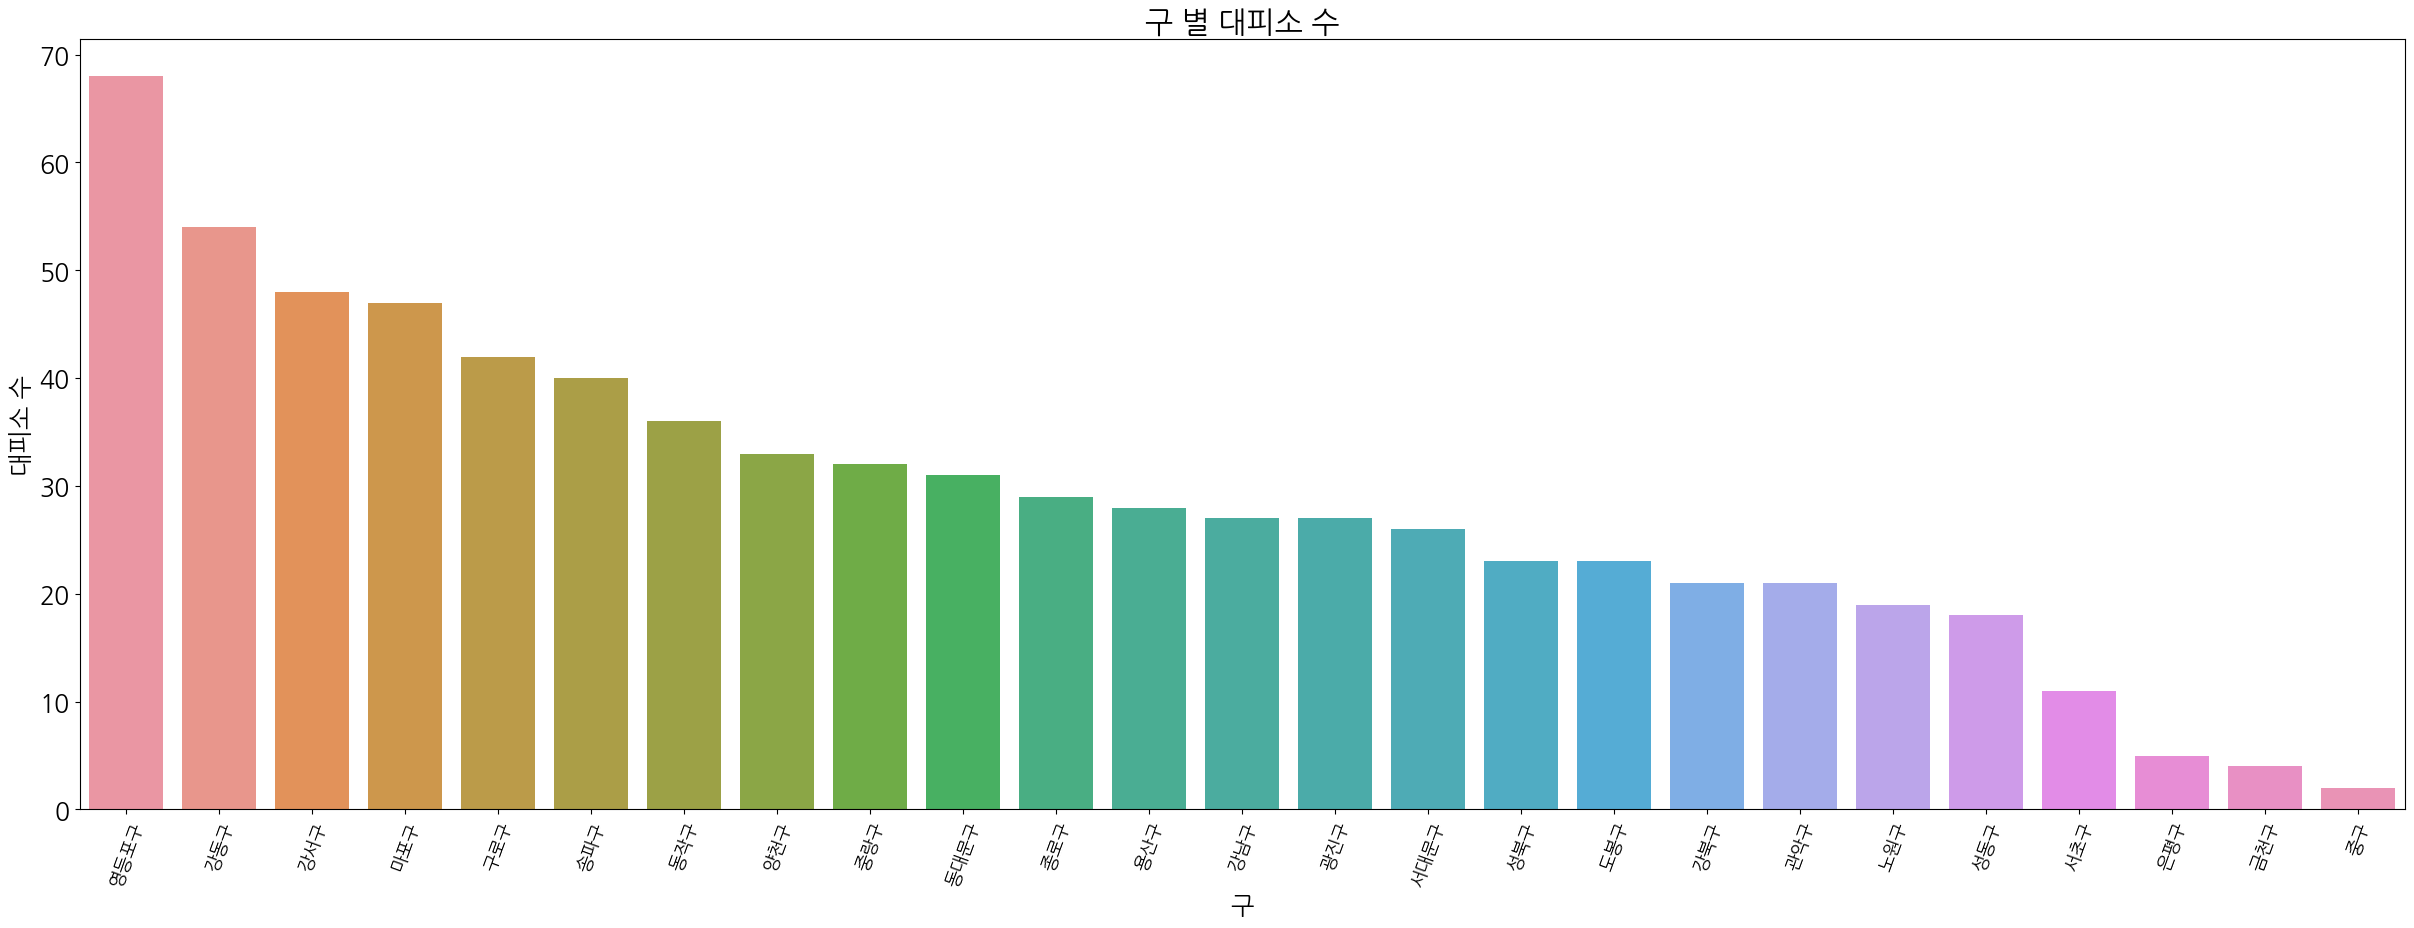

In [ ]:
plt.figure(figsize = (30, 10))
plt.rc('font', family='NanumGothic')
plt.xticks(rotation = 70, fontsize = 13)
plt.title("구 별 대피소 수")
sns.barplot(x = shelter["구"], y = shelter["대피소 수"])
plt.show()

### 대피소 유형별 EDA

In [ ]:
shelter = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/P-Median-Algorithm/data/서울시 수해대피소 공간정보(구추가).csv")
shelter = shelter[["구", "대피소 명칭", "수용가능최대인원"]]
print(shelter.head())
print("---------------")
print(shelter.isnull().sum())

      구     대피소 명칭  수용가능최대인원
0   강서구     화촌 경로당        59
1   강서구     화곡초등학교      1100
2  영등포구  신길6동 주민센터       318
3   구로구  구로2동 주민센터         0
4   동작구      현장민원실        25
---------------
구           0
대피소 명칭      0
수용가능최대인원    0
dtype: int64


#### 주민센터 데이터

In [ ]:
shelter_1 = shelter[shelter["대피소 명칭"].str.contains("주민센터")]
shelter_1.head()

,구,대피소 명칭,수용가능최대인원
2,영등포구,신길6동 주민센터,318
3,구로구,구로2동 주민센터,0
9,영등포구,영등포본동 주민센터,50
16,구로구,고척2동 주민센터,0
17,영등포구,신길4동 주민센터,150


In [ ]:
# 주민센터 수해대피소 수
shelter_1.shape[0]

81

In [ ]:
# 수용가능최대인원 0 주민센터 수해대피소 수
shelter_1[shelter_1["수용가능최대인원"] == 0].shape[0]

52

In [ ]:
shelter_1[shelter_1["수용가능최대인원"] != 0]["수용가능최대인원"].describe()

count     29.000000
mean     122.724138
std      114.174333
min        5.000000
25%       35.000000
50%       90.000000
75%      180.000000
max      431.000000
Name: 수용가능최대인원, dtype: float64

In [ ]:
shelter_1[shelter_1["수용가능최대인원"] != 0]["수용가능최대인원"].median()

90.0

#### 학교 데이터

In [ ]:
shelter_2 = shelter[shelter["대피소 명칭"].str.contains("학교")]
shelter_2.head()

,구,대피소 명칭,수용가능최대인원
1,강서구,화곡초등학교,1100
5,관악구,서울당곡초등학교,330
6,강서구,덕원중학교,450
7,구로구,서울개봉초등학교,0
8,양천구,남명초등학교,190


In [ ]:
# 수용가능최대인원 0 학교 수해대피소 수
shelter_2[shelter_2["수용가능최대인원"] == 0].shape[0]

99

In [ ]:
shelter_2[shelter_2["수용가능최대인원"] != 0]["수용가능최대인원"].describe()

count     313.000000
mean     1294.507987
std      1158.576993
min        30.000000
25%       464.000000
50%      1000.000000
75%      1740.000000
max      8000.000000
Name: 수용가능최대인원, dtype: float64

In [ ]:
shelter_2[shelter_2["수용가능최대인원"] != 0]["수용가능최대인원"].median()

1000.0

#### 주민센터, 학교 외 수용가능최대인원 0인 데이터들 구하기

In [ ]:
idx1 = np.array(shelter[shelter["대피소 명칭"].str.contains("주민센터")].index)
idx2 = np.array(shelter[shelter["대피소 명칭"].str.contains("학교")].index)
idx3 = np.array(shelter[shelter["대피소 명칭"].str.contains("교회")].index)
idx4 = np.array(shelter[shelter["대피소 명칭"].str.contains("경로당")].index)

idx5 = np.concatenate((idx1, idx2, idx3, idx4))
idx5.sort()
idx5 = list(idx5)

shelter_3 = shelter.iloc[idx5, :]
shelter_3

,구,대피소 명칭,수용가능최대인원
0,강서구,화촌 경로당,59
1,강서구,화곡초등학교,1100
2,영등포구,신길6동 주민센터,318
3,구로구,구로2동 주민센터,0
5,관악구,서울당곡초등학교,330
...,...,...,...
710,마포구,서강초등학교,290
711,마포구,연서경로당,41
712,동작구,신남성초등학교,810
713,관악구,원당초등학교,60


In [ ]:
# 교회 수해대피소 수
shelter_3[shelter_3["대피소 명칭"].str.endswith("교회")].shape[0]

66

In [ ]:
# 수용가능최대인원 0 교회 수해대피소 수
shelter_null = shelter_3[shelter_3["수용가능최대인원"] == 0]
shelter_null[shelter_null["대피소 명칭"].str.endswith("교회")].shape[0]

16

In [ ]:
# 교회 데이터 분리
shelter_4 = shelter_3[shelter_3["대피소 명칭"].str.endswith("교회")]
shelter_4.head()

,구,대피소 명칭,수용가능최대인원
10,영등포구,신길교회,500
12,영등포구,여의도순복음교회,636
23,동작구,강남교회,40
25,마포구,평강교회,337
33,종로구,창신제일교회,40


In [ ]:
shelter_4[shelter_4["수용가능최대인원"] != 0]["수용가능최대인원"].describe()

count      50.000000
mean      380.040000
std       548.055299
min        10.000000
25%        96.250000
50%       190.000000
75%       384.250000
max      2600.000000
Name: 수용가능최대인원, dtype: float64

In [ ]:
shelter_4[shelter_4["수용가능최대인원"] != 0]["수용가능최대인원"].median()

190.0

In [ ]:
# 주민센터, 학교, 교회 제외
idx6 = np.concatenate((idx1, idx2, idx3))
shelter_5 = shelter.drop(idx6, axis = 0)
shelter_5.reset_index(inplace = True, drop = True)
shelter_5[shelter_5["수용가능최대인원"] == 0]

,구,대피소 명칭,수용가능최대인원
24,성동구,성동세무서,0
69,강동구,강동어린이회관,0
71,강동구,시영경로당,0
93,서초구,서초구청,0
100,강동구,경희대동서신의학병원,0
102,강동구,강동롯데캐슬경로당,0
107,중구,중구민회관,0
122,강동구,온조대왕문화체육관,0
123,강동구,해공도서관,0
124,강동구,강동성심병원,0


In [ ]:
shelter_6 = shelter[shelter["대피소 명칭"].str.endswith("경로당")]
shelter_6 = shelter_6[shelter_6["수용가능최대인원"] != 0]
shelter_6.median()

수용가능최대인원    36.0
dtype: float64

#### 수해대피소 데이터 EDA 정리

- 서울 시 수해대피소 총 715개
    - 수용가능최대인원 0인 데이터 : 180개(전체 데이터 중 25%)
    - 학교 : 402개
        - 수용가능최대인원 0인 데이터 : 95개
        - 수용가능최대인원 0 제외
            - 평균 : 1311
            - 표준편차 : 1163
            - 중앙값 : 1000
    - 주민센터 : 81개
        - 수용가능최대인원 0인 데이터 : 52개
         - 수용가능최대인원 0 제외
            - 평균 : 123
            - 표준편차 :114
            - 중앙값 : 90
    - 교회 : 66개
        - 수용가능최대인원 0인 데이터 : 16게
        - 수용가능데이터 0 제외
            - 평균 : 380
            - 표준편차 : 548
            - 중앙값 : 190           
    - 경로당 : 68개
        - 수용가능데이터 0 제외
          - 중앙값 : 36

## 침수심 데이터

- 침수유발 기준강우량 데이터
  - 침수를 유발하는 강수량이 적을수록 적은 강수량에도 침수 피해가 큰 구라고 예측할 수 있음

- 변수설명
    - ID : 아이디(식별을 위한 번호)
    - GID : 격자번호(국가지점번호)
    - SD CD : 시도코드
    - SD NM : 시도명
    - SGG CD : 시군구코드
    - SGG NM : 시군구명
    - INCLINATION : 기울기
    - INTERCEPT : y절편
    - DEPTH 10 : 10cm 침수심 유발 강수량
    - DEPTH 20 : 20cm 침수심 유발 강수량
    - DEPTH 50 : 50cm 침수심 유발 강수량

In [ ]:
depth = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/P-Median-Algorithm/data/depth_2021.csv")
depth.head()

,ID,GID,SD_CD,SD_NM,SGG_CD,SGG_NM,INCLINATION,INTERCEPT,DEPTH_10,DEPTH_20,DEPTH_50
0,35228,다사3550,11,서울,11500,강서구,7.61,-18.89,57.2,133.29,361.56
1,35229,다사3551,11,서울,11500,강서구,7.61,-18.89,57.2,133.29,361.56
2,35230,다사3552,11,서울,11500,강서구,7.61,-18.89,57.2,133.29,361.56
3,35323,다사3649,11,서울,11500,강서구,7.61,-18.89,57.2,133.29,361.56
4,35324,다사3650,11,서울,11500,강서구,7.61,-18.89,57.2,133.29,361.56


In [ ]:
# 시군구별 10cm, 20cm, 50cm 침수심 유발 강수량 평균 산출
depth = depth.groupby("SGG_NM").mean()[["DEPTH_10", "DEPTH_20", "DEPTH_50"]]
df_depth = pd.DataFrame(depth)
df_depth.reset_index(inplace = True)
df_depth.head()

,SGG_NM,DEPTH_10,DEPTH_20,DEPTH_50
0,강남구,65.380536,177.840714,515.236250
1,강동구,179.900000,472.800000,1351.500000
2,강북구,49.510000,166.010000,515.510000
3,강서구,69.379231,226.613692,698.317077
4,관악구,53.834444,248.234444,831.436667


### 시각화
- 10cm 침수심이 가장 낮은 구(8개)
  - 도봉구, 영등포구, 중구, 동대문구, 성북구, 서초구, 강북구, 노원구
- 20cm 침수심이 가장 낮은 구(8개)
  - 도봉구, 서초구, 구로구, 금천구, 종로구, 동대문구, 성북구, 강북구
- 50cm 침수심이 가장 낮은 구(8개)
  - 도봉구, 서초구, 종로구, 구로구, 금천구, 동대문구, 성북구, 송파구

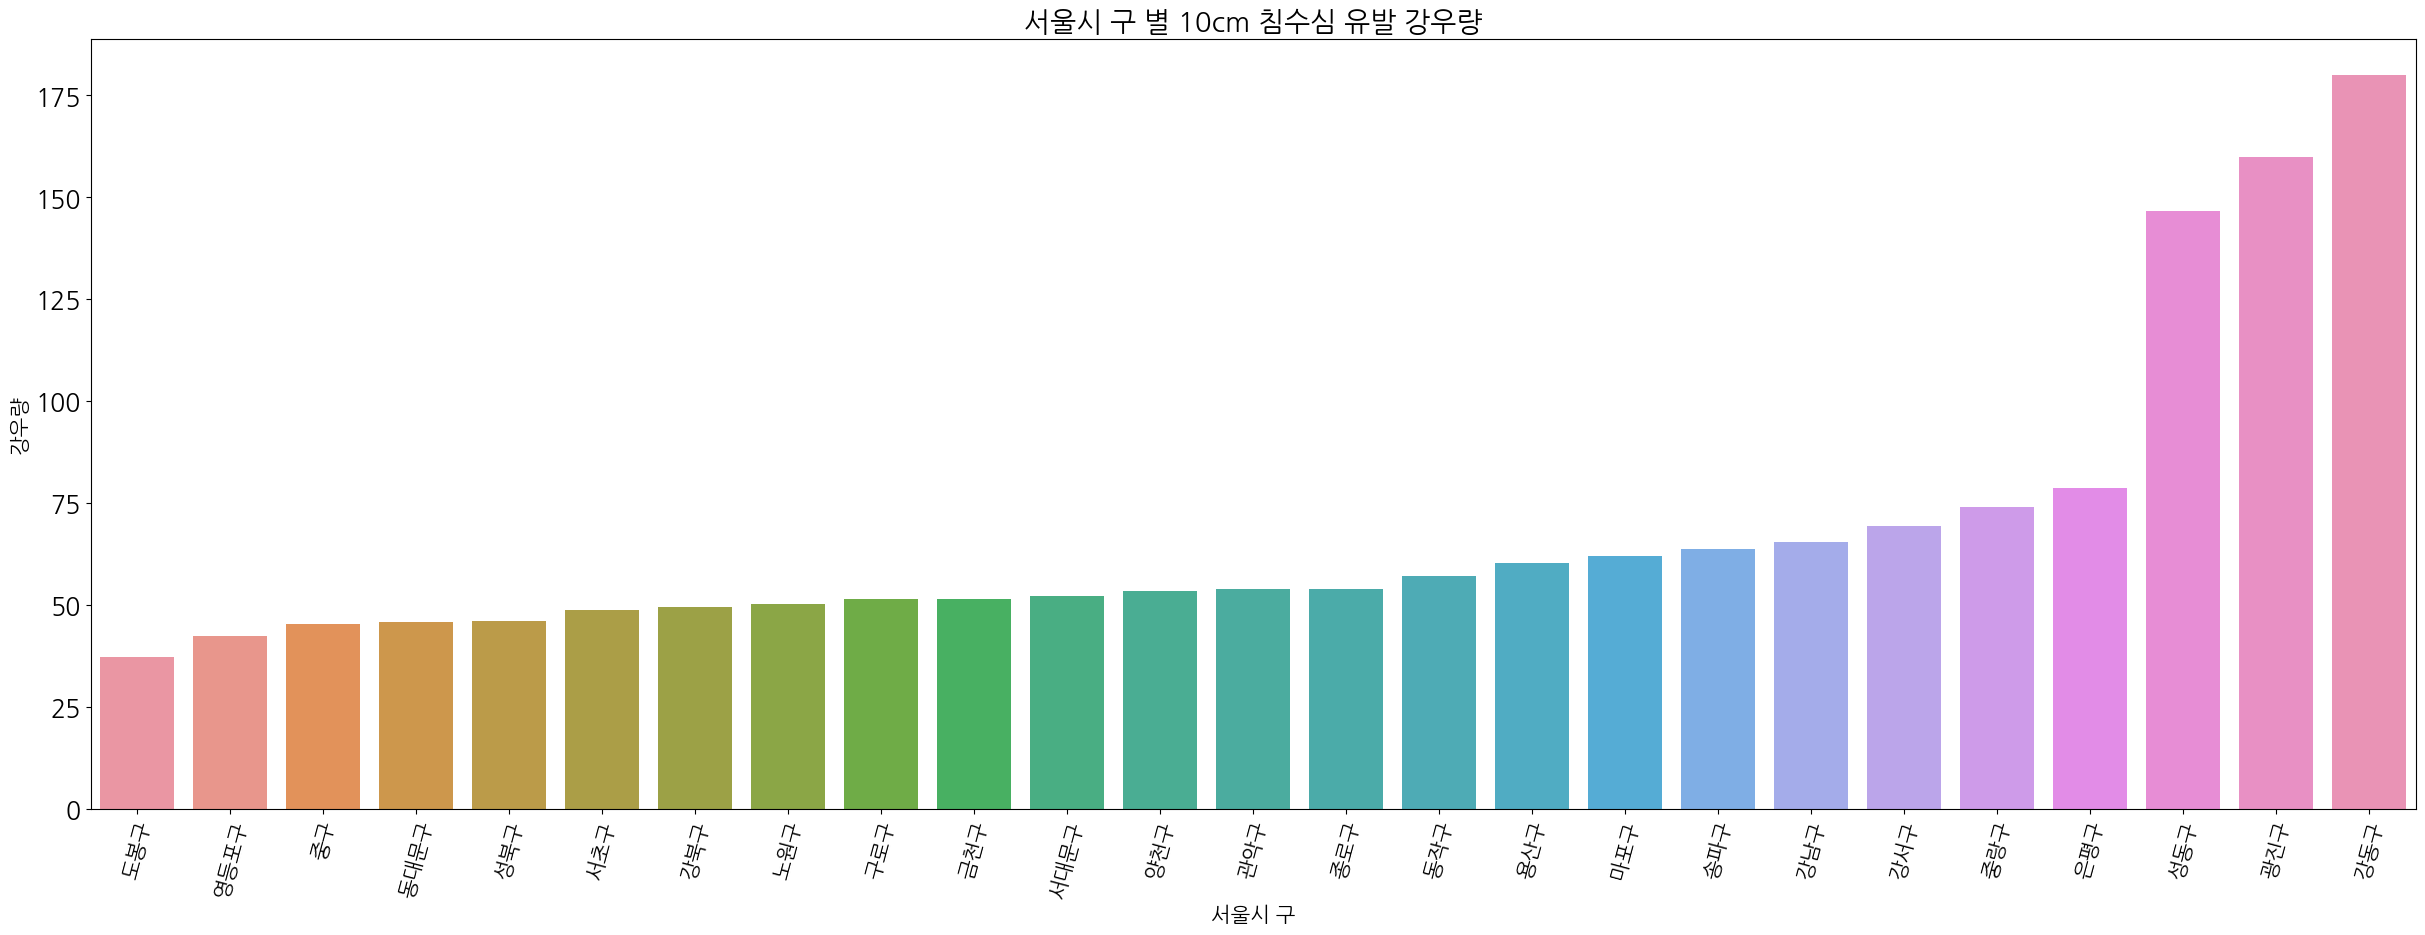

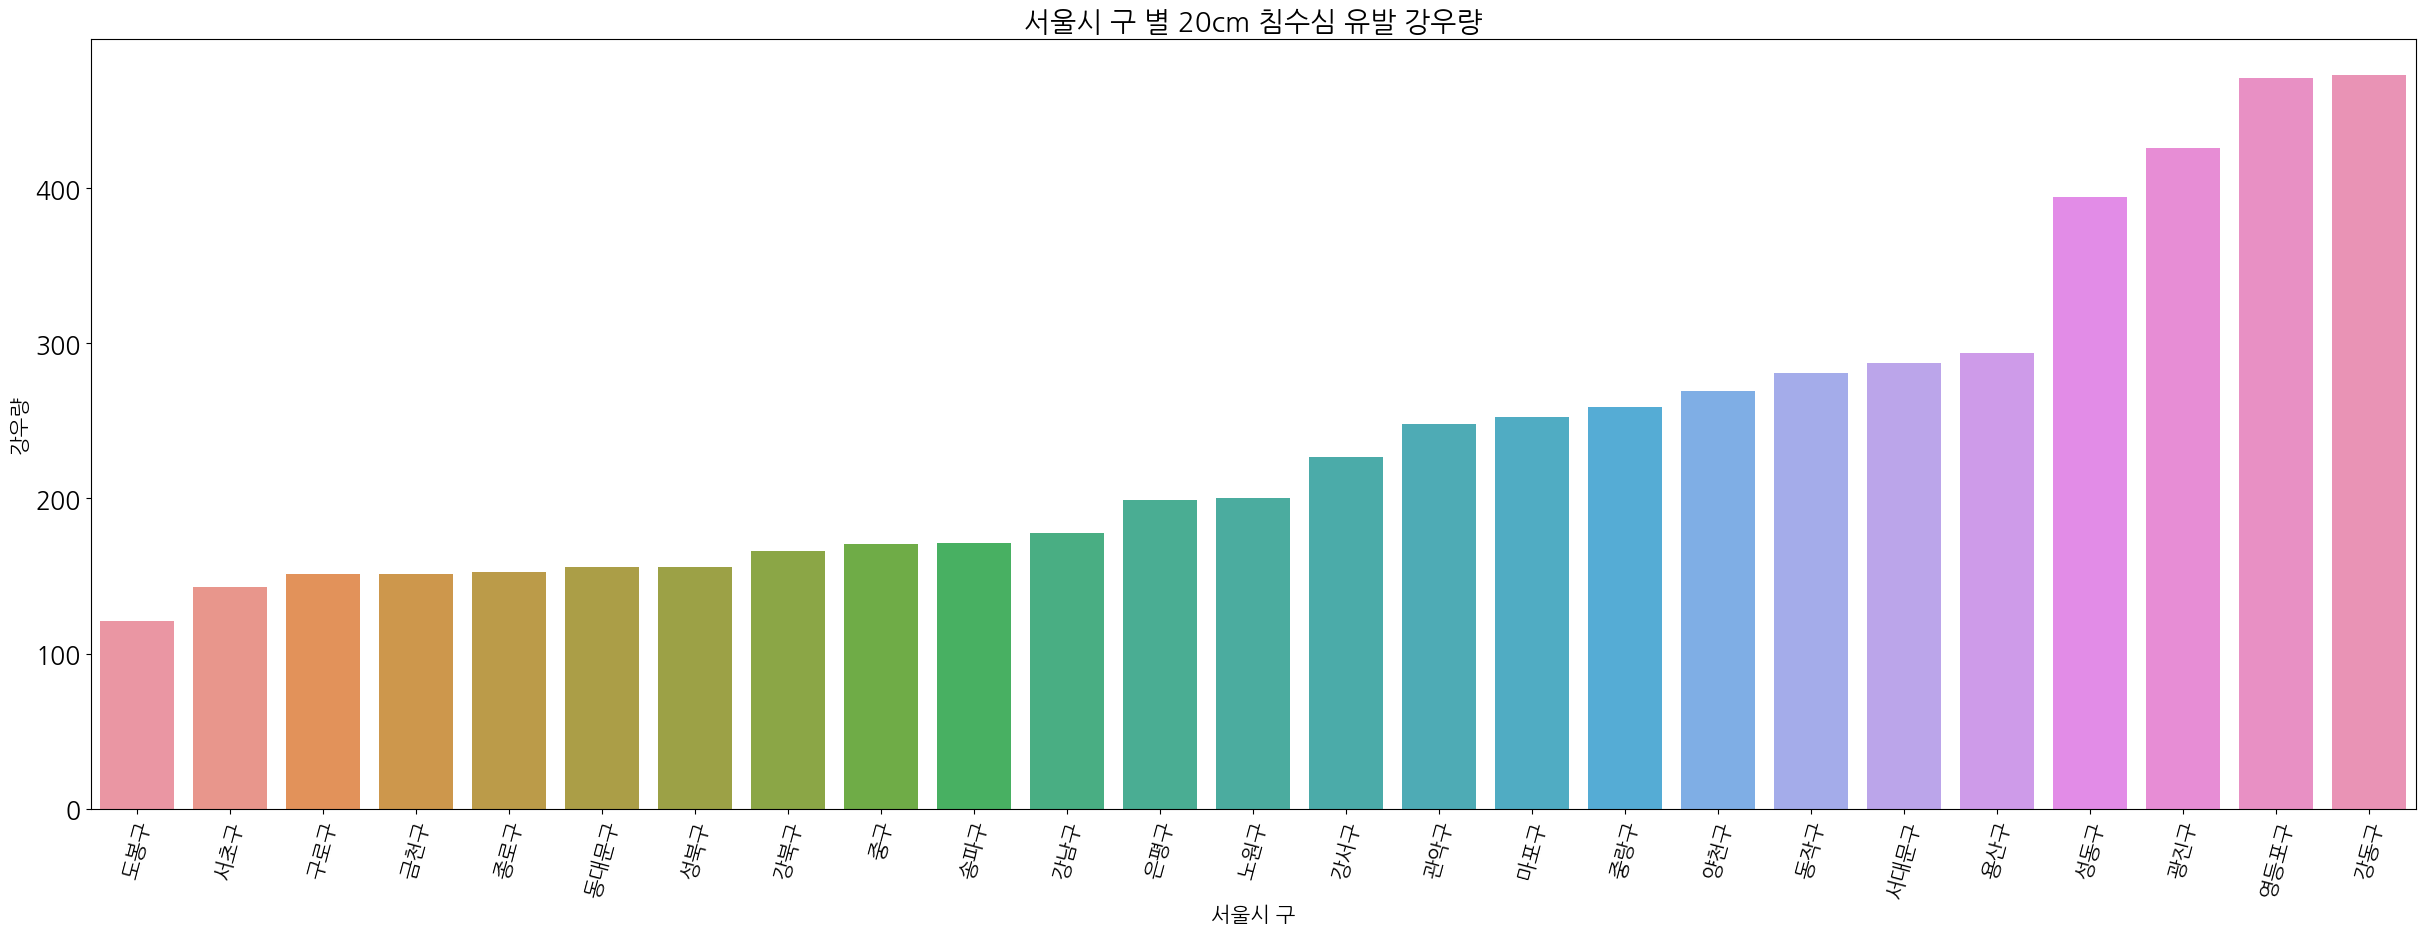

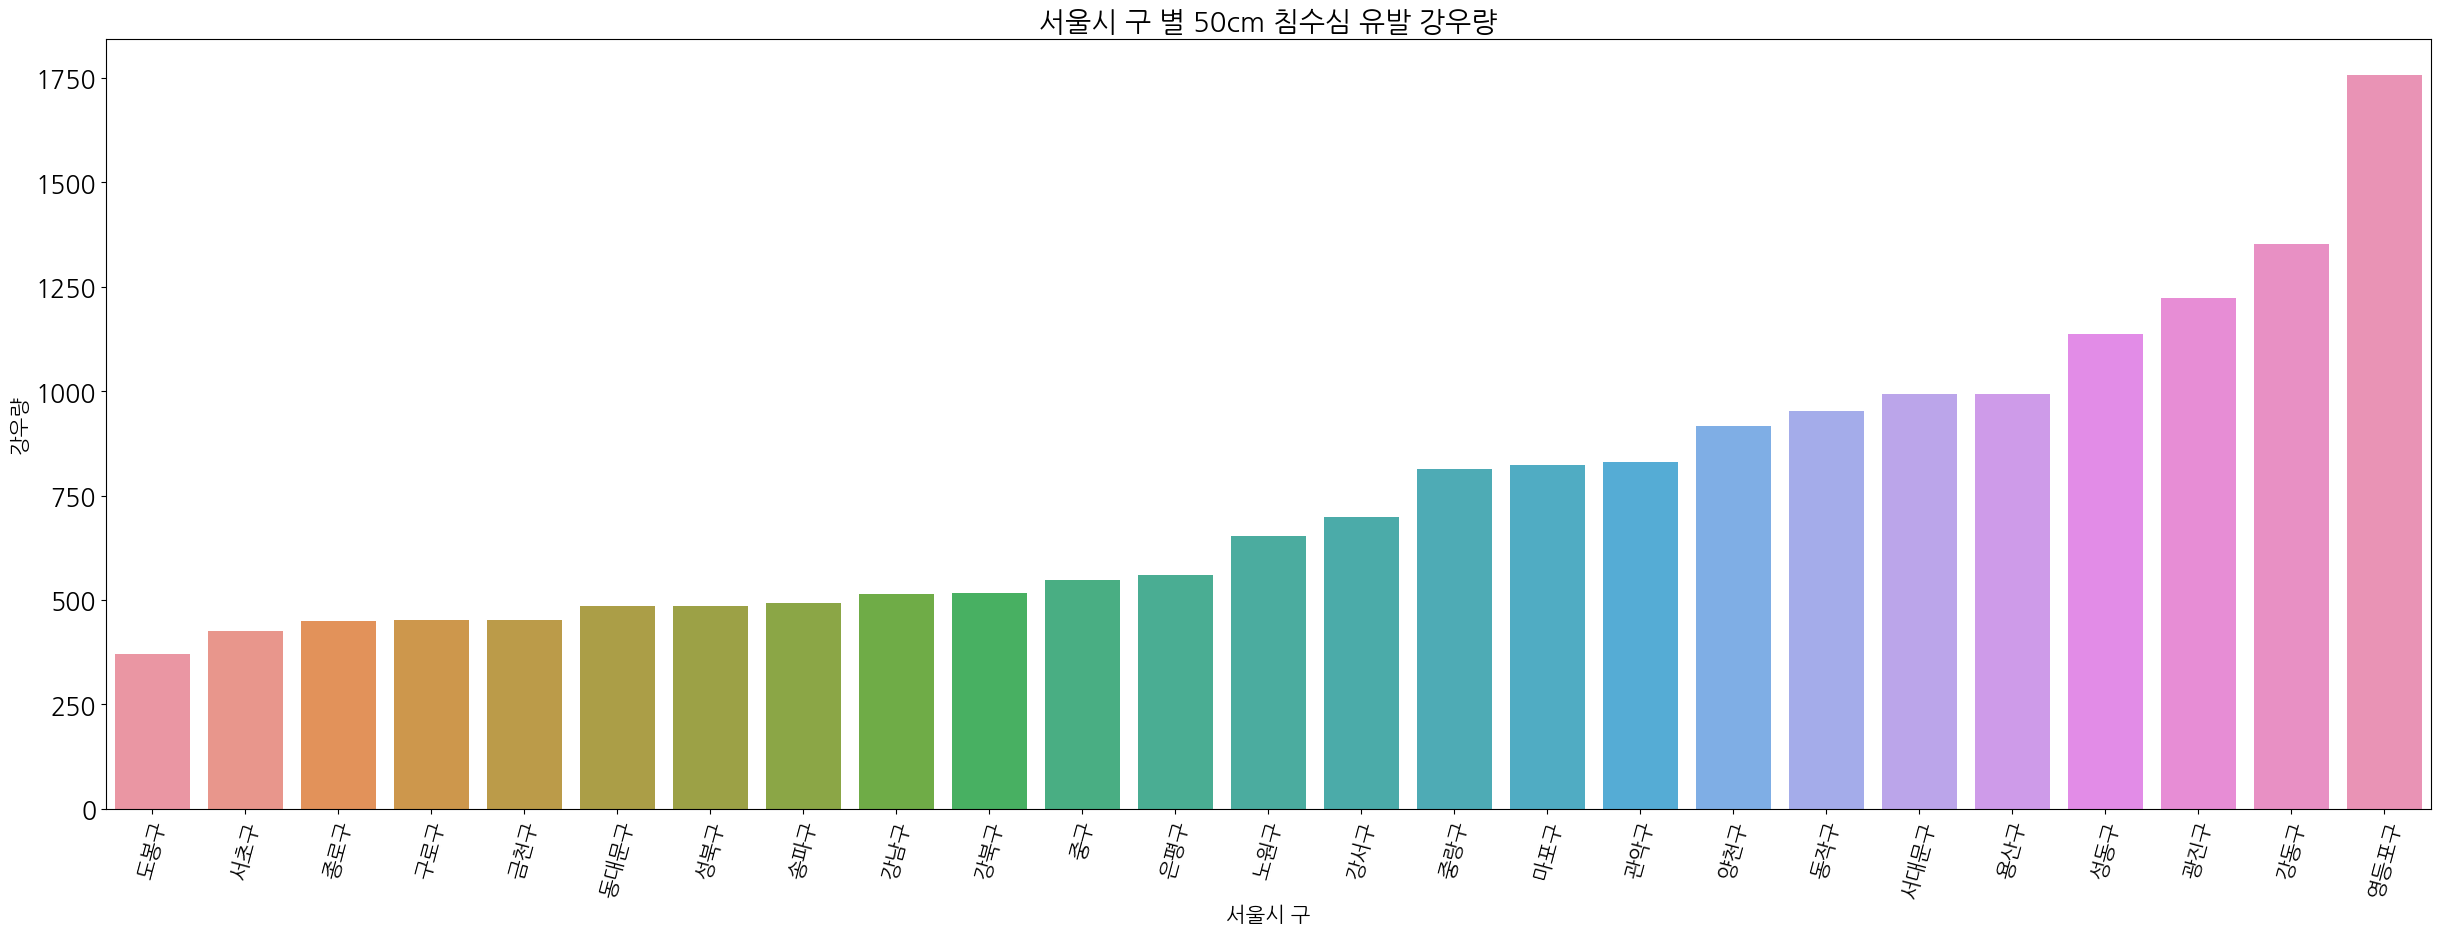

In [ ]:
li = [10, 20, 50]

for i in li:
  fig = plt.figure(figsize = (30, 10))

  ax = fig.add_subplot(1, 1, 1)

  df_depth.sort_values(by = f"DEPTH_{i}", inplace = True)
  sns.barplot(x = df_depth["SGG_NM"], y = df_depth[f"DEPTH_{i}"])
  plt.title(f"서울시 구 별 {i}cm 침수심 유발 강우량", size = 20)
  ax.set_xticklabels(df_depth["SGG_NM"], rotation = 75, fontsize = 15)
  plt.ylabel("강우량", size = 15)
  plt.xlabel("서울시 구", size = 15)

  plt.show()

## 독거노인 데이터
- 서울시에서 독거노인이 가장 많은 구와 지역을 파악하기 위함

In [ ]:
aged = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/P-Median-Algorithm/data/독거노인현황.csv")
aged.head(10)

,동별(1),동별(2),동별(3),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11
0,동별(1),동별(2),동별(3),합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계
1,동별(1),동별(2),동별(3),소계,소계,소계,국민기초생활보장 수급권자,국민기초생활보장 수급권자,국민기초생활보장 수급권자,저소득노인,저소득노인,저소득노인,일 반,일 반,일 반
2,동별(1),동별(2),동별(3),계,65~79세,80세 이상,계,65~79세,80세 이상,계,65~79세,80세 이상,계,65~79세,80세 이상
3,서울특별시,소계,소계,392351,291042,101309,110183,76181,34002,14471,8250,6221,267697,206611,61086
4,서울특별시,종로구,소계,8573,6219,2354,1839,1356,483,337,197,140,6397,4666,1731
5,서울특별시,종로구,사직동,490,320,170,60,41,19,10,6,4,420,273,147
6,서울특별시,종로구,삼청동,189,126,63,17,12,5,6,1,5,166,113,53
7,서울특별시,종로구,부암동,418,293,125,61,40,21,20,13,7,337,240,97
8,서울특별시,종로구,평창동,703,456,247,48,31,17,22,10,12,633,415,218
9,서울특별시,종로구,무악동,291,208,83,59,35,24,11,5,6,221,168,53


In [ ]:
aged = aged[["동별(2)", "동별(3)", "2021", "2021.3", "2021.6", "2021.9"]]
aged.columns = ["구", "동", "총계", "국민기초생활보장수급권자", "저소득노인", "일반"]
aged = aged.drop([0, 1, 2, 3], axis = 0)
aged.reset_index(inplace = True, drop = True)
aged[["총계", "국민기초생활보장수급권자", "저소득노인", "일반"]] = aged[["총계", "국민기초생활보장수급권자", "저소득노인", "일반"]].apply(pd.to_numeric)
aged.head()

,구,동,총계,국민기초생활보장수급권자,저소득노인,일반
0,종로구,소계,8573,1839,337,6397
1,종로구,사직동,490,60,10,420
2,종로구,삼청동,189,17,6,166
3,종로구,부암동,418,61,20,337
4,종로구,평창동,703,48,22,633


In [ ]:
aged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   구             451 non-null    object
 1   동             451 non-null    object
 2   총계            451 non-null    int64 
 3   국민기초생활보장수급권자  451 non-null    int64 
 4   저소득노인         451 non-null    int64 
 5   일반            451 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 21.3+ KB


### 시각화
- 서울시에서 독거노인이 가장 많은 구 8개
  - 강북구, 노원구, 강서구, 은평구, 관악구, 중량구, 송파구, 성북구
- 서울시에서 독거노인이 가장 많은 지역 8개
  - 강서구 등촌3동, 강북구 송천동, 노원구 중계2.3동, 강북구 인수동, 강북구 번3동, 강북구 삼양동, 강북구 송중동, 은평구 불광1동, 은평구 역촌동, 강서구 화곡1동

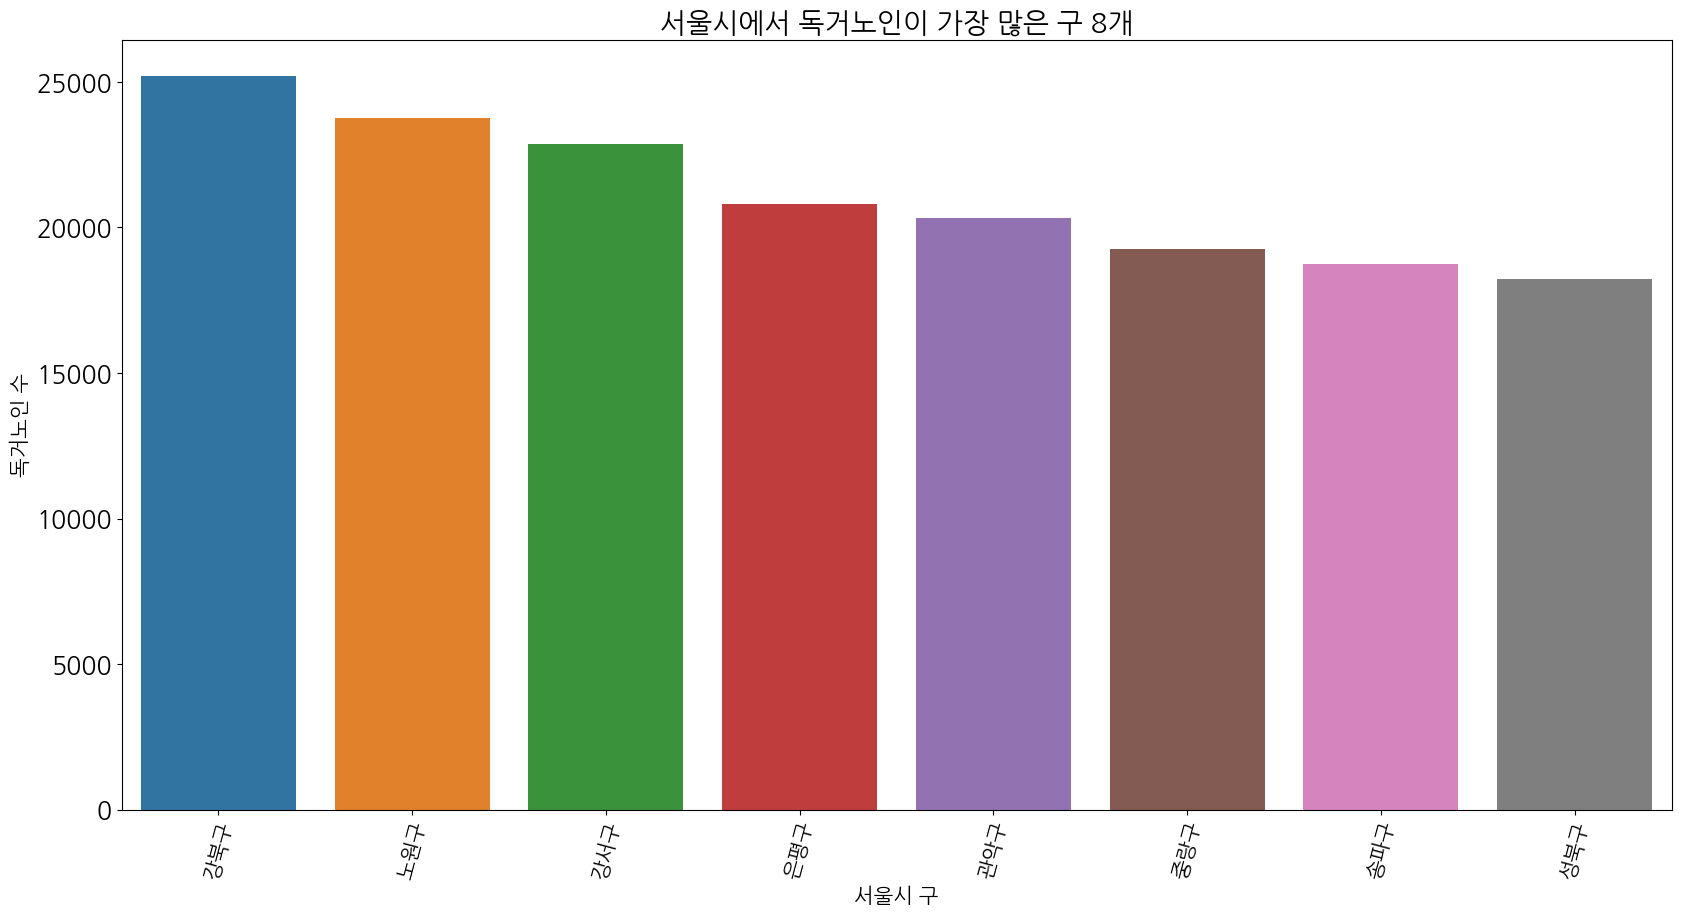

In [ ]:
fig = plt.figure(figsize = (20, 10))

ax = fig.add_subplot(1, 1, 1)

aged_gu = aged.sort_values(by = "총계", ascending = False).head(8)
sns.barplot(x = aged_gu["구"], y = aged_gu["총계"])
plt.title("서울시에서 독거노인이 가장 많은 구 8개", size = 20)
ax.set_xticklabels(aged_gu["구"], rotation = 75, fontsize = 15)
plt.ylabel("독거노인 수", size = 15)
plt.xlabel("서울시 구", size = 15)

plt.show()

In [ ]:
idx = aged[aged["동"] == "소계"].index
aged = aged.drop(idx, axis = 0)
aged = aged.sort_values("총계", ascending = False).head(10)
aged["위치"] = aged["구"] + " " + aged["동"]
aged.head()

,구,동,총계,국민기초생활보장수급권자,저소득노인,일반,위치
259,강서구,등촌3동,2696,1777,61,858,강서구 등촌3동
148,강북구,송천동,2659,603,88,1968,강북구 송천동
185,노원구,중계2.3동,2530,1288,100,1142,노원구 중계2.3동
151,강북구,인수동,2468,497,112,1859,강북구 인수동
141,강북구,번3동,2299,782,104,1413,강북구 번3동


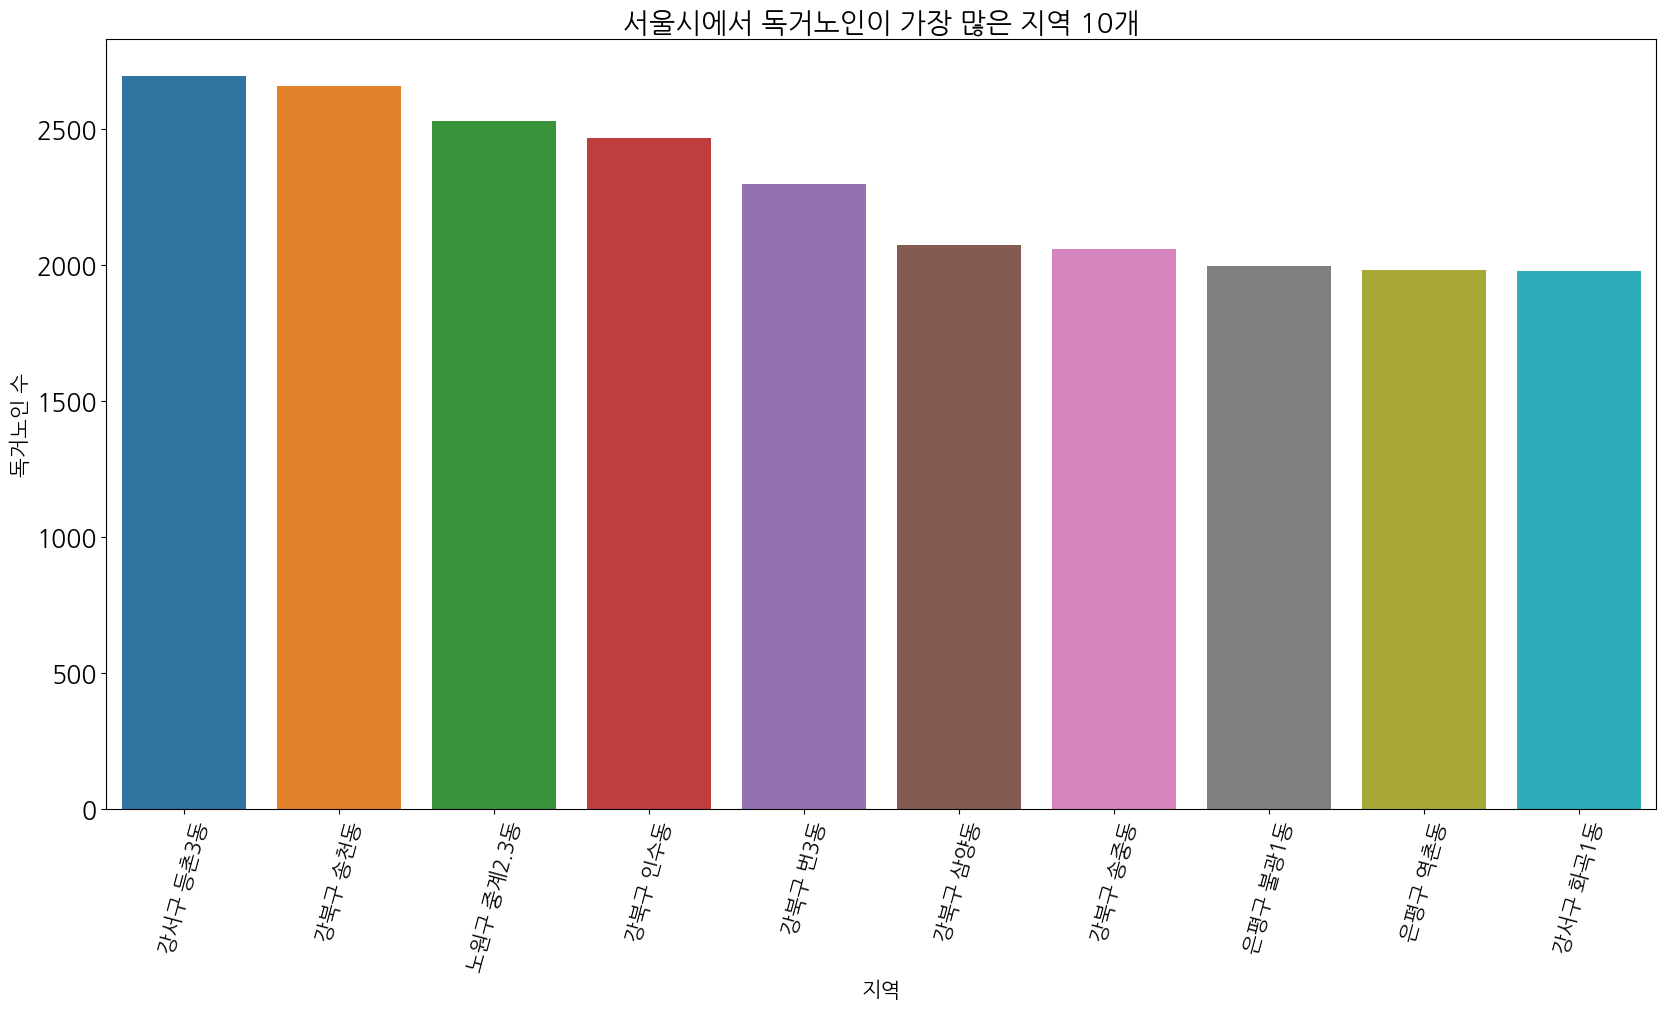

In [ ]:
fig = plt.figure(figsize = (20, 10))

ax = fig.add_subplot(1, 1, 1)

plt.rc('font', family='NanumGothic')

sns.barplot(x = aged["위치"], y = aged["총계"])
plt.title("서울시에서 독거노인이 가장 많은 지역 10개", size = 20)
ax.set_xticklabels(aged["위치"], rotation = 75, fontsize = 15)
plt.ylabel("독거노인 수", size = 15)
plt.xlabel("지역", size = 15)

plt.show()